Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )



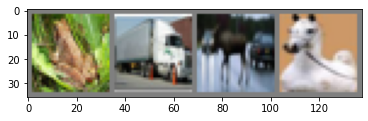

 frog truck  deer horse
torch.Size([4, 3, 32, 32])
Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True
label False
out True


KeyboardInterrupt: ignored

In [1]:
### Training an image classifier ###
# We will do the following steps in order:
  # 1. Load and normalizing the CIFAR10 training and test datasets using torchvision
  # 2. Define a Convolutional Neural Network
  # 3. Define a loss function
  # 4. Train the network on the training data
  # 5. Test the network on the test data

# ============================================================================================================================ #
# 1. Loading and normalizing CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms

# The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(trainset)
print(testset)

# ---------------------------------------------------------------------------------------------------------------- #

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
print(images.size())
# ============================================================================================================================ #


### 2. Define a Convolutional Neural Network ###
# Copy the neural network from the Neural Networks section before and modify it to take 
# 3-channel images (instead of 1-channel images as it was defined).

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


### 3. Define a Loss function and optimizer ###
# Let’s use a Classification Cross-Entropy loss and SGD with momentum.
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


### 4. Train the network ###
# We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

# Let’s quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


### 5. Test the network on the test data ###

#Let us display an image from the test set to get familiar.
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Next, let’s load back in our saved model (note: saving and re-loading the model wasn’t necessary here,
# we only did it to illustrate how to do so):
net = Net()
net.load_state_dict(torch.load(PATH))

#Okay, now let us see what the neural network thinks these examples above are:
print('*****',images.size())
outputs = net(images)

# The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks
# that the image is of the particular class. So, let’s get the index of the highest energy:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

# Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

# what are the classes that performed well, and the classes that did not perform well:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

# How do we run these neural networks on the GPU?


# ============================== TRAINIG ON GPU ======================================================================

### Training on GPU ###

# Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU.
# Let’s first define our device as the first visible cuda device if we have CUDA available:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

# The rest of this section assumes that device is a CUDA device.
# Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:

net.to(device)

# Remember that you will have to send the inputs and targets at every step to the GPU too:

inputs, labels = data[0].to(device), data[1].to(device)

print('\n\n\n')
'''
  Why dont I notice MASSIVE speedup compared to CPU? Because your network is really small.

  Exercise: Try increasing the width of your network (argument 2 of the first nn.Conv2d, and argument 1 of the second nn.Conv2d – they need to be the same number), see what kind of speedup you get.

  Goals achieved:
      1. Understanding PyTorch’s Tensor library and neural networks at a high level.
      2. Train a small neural network to classify images

  ### Training on multiple GPUs ###
  If you want to see even more MASSIVE speedup using all of your GPUs, please check out Optional: Data Parallelism.
'''
# ====================================================================================================================